<a href="https://colab.research.google.com/github/ikiskin/OpenAPIReviews/blob/master/NeurIPSOpenReviewDatasetAndBenchmarksRound2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openreview-py pandas matplotlib seaborn

     |████████████████████████████████| 274 kB 35.7 MB/s 
     |████████████████████████████████| 803 kB 31.4 MB/s 
     |████████████████████████████████| 253 kB 69.0 MB/s 
     |████████████████████████████████| 1.9 MB 65.4 MB/s 
     |████████████████████████████████| 162 kB 57.5 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=11409db1f1ad2a293cbdcec57b87e3339a8a9d54e3e0398b606358d8f01a7e54
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 

getting metadata...
Mean:  5.829396325459317
Medians:  5.846456692913386


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


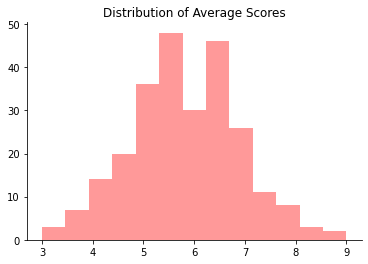

In [2]:
# Code heavily borrowed from openreview-py's examples: https://openreview-py.readthedocs.io/en/latest/examples.html

from collections import defaultdict, deque

import openreview
import io
import os
import json
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

guest_client = openreview.Client(baseurl='https://api.openreview.net')
submissions = openreview.tools.iterget_notes(
        guest_client, invitation='NeurIPS.cc/2021/Track/Datasets_and_Benchmarks/Round2/-/Submission')


submissions_by_forum = {n.forum: n for n in submissions}
print('getting metadata...')
# print(submissions_by_forum)
# There should be 3 reviews per forum.
reviews = openreview.tools.iterget_notes(
    guest_client, invitation='NeurIPS.cc/2021/Track/Datasets_and_Benchmarks/Round2/Paper.*/-/Official_Review')
reviews_by_forum = defaultdict(list)
for review in reviews:
    reviews_by_forum[review.forum].append(review)

# Build a list of metadata.
# For every paper (forum), get the review ratings
metadata = []
means, medians, all_scores = [], [], []
for forum in submissions_by_forum:
    forum_reviews = reviews_by_forum[forum]
    review_ratings = [n.content['rating'] for n in forum_reviews]
    review_scores = []
    for score in review_ratings:
        idx = score.find(':')
        review_scores.append(int(score[:idx]))

    for s in review_scores:
        all_scores.append(s)
    mean = statistics.mean(review_scores)
    median = statistics.median(review_scores)
    means.append(mean)
    medians.append(median)

    forum_metadata = {
        'forum': forum,
        'url': 'https://openreview.net/forum?id=' + forum,
        'title': submissions_by_forum[forum].content['title'],
        'scores': review_scores,
        'avg_score': mean
    }
    metadata.append(forum_metadata)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.DataFrame(metadata)
df = df.sort_values(by=['avg_score'], ascending=False)
print('Mean: ', statistics.mean(means))
print('Medians: ', statistics.mean(medians))
sns.distplot(means, kde=False, color='red').set_title('Distribution of Average Scores')
sns.despine()

In [3]:
submissions_by_forum = {n.forum: n for n in submissions}
# print('getting metadata...')
print(submissions_by_forum)

{}


In [4]:
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)
df.style.format({'url': make_clickable})
df.style.hide_index()
df = df.drop(columns=['forum'])
df = df.round(2)

### Sorted List of Papers

In [5]:
print(df.to_string())

                                             url                                                                                                                                                                           title           scores  avg_score
86   https://openreview.net/forum?id=KGeAHDH4njY                                                                                                         Mitigating dataset harms requires stewardship: Lessons from 1000 papers   [8, 8, 10, 10]       9.00
9    https://openreview.net/forum?id=zNQBIBKJRkd                                                                                               Reduced, Reused and Recycled: The Life of a  Dataset in Machine Learning Research       [8, 8, 10]       8.67
85    https://openreview.net/forum?id=H-d5634yVi                                                                                                                                  Chest ImaGenome Dataset for Clinical Reasoning   [8, 10, 10, 6]

In [9]:
len(df)

254

In [7]:
df.index.get_loc(48)

55

In [8]:
89/154

0.577922077922078